In [68]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense

In [69]:
ab_path='../data/ACWI-Daily-Y09-Now.csv'

start_date='2020-01-01'
end_date='2022-12-31'

prediction_col='EMA1'
look_back = 22
train_ratio= 0.8

['Ticker', 'Date', 'Price', 'EMA1', 'EMA2', 'EMA3', 'MACD', 'SIGNAL', 'RSI', 'RSI-MA']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737 entries, 2020-01-02 to 2022-12-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EMA1    737 non-null    float64
dtypes: float64(1)
memory usage: 11.5 KB
None
             EMA1
Date             
2022-11-28  86.91
2022-11-29  86.96
2022-11-30  87.45
2022-12-01  87.88
2022-12-02  88.22


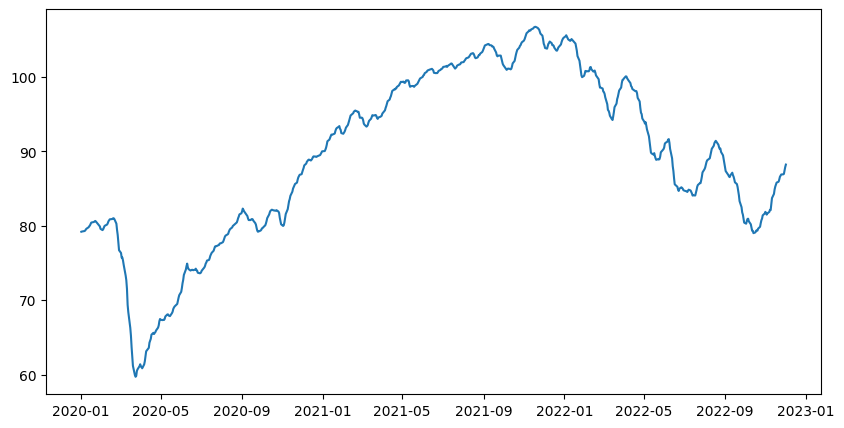

In [70]:
dataframe=pd.read_csv(f'{ab_path}',parse_dates=['Date/Time'],dayfirst=True)
dataframe.rename(columns={'Date/Time':'Date'},inplace=True)
allCols=list(dataframe.columns)
print(allCols)

dataframe['Date']=dataframe['Date'].apply( lambda  dx :  datetime(dx.year,dx.month,dx.day ))
dataframe.set_index('Date',inplace=True)
dataframe=dataframe.loc[start_date:end_date,:]
dataframe=dataframe[[prediction_col]]
print(dataframe.info())
print(dataframe.tail())

# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(dataframe)
plt.show()

In [71]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [72]:
# fix random seed for reproducibility
np.random.seed(7)

In [73]:
print("Split into train and test sets")
dataset = dataframe.to_numpy()
# split into train and test sets
train_size = int(len(dataset) * train_ratio)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(train.shape, test.shape)


print("Create dasta set for training time series")
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape,trainY.shape)
print(trainX[:5])
print(trainY[:5])

Split into train and test sets
(589, 1) (148, 1)
Create dasta set for training time series
(566, 22) (566,)
[[79.2  79.23 79.29 79.3  79.38 79.53 79.62 79.8  79.94 80.04 80.23 80.43
  80.51 80.58 80.65 80.58 80.25 80.12 80.01 79.92 79.59 79.42]
 [79.23 79.29 79.3  79.38 79.53 79.62 79.8  79.94 80.04 80.23 80.43 80.51
  80.58 80.65 80.58 80.25 80.12 80.01 79.92 79.59 79.42 79.52]
 [79.29 79.3  79.38 79.53 79.62 79.8  79.94 80.04 80.23 80.43 80.51 80.58
  80.65 80.58 80.25 80.12 80.01 79.92 79.59 79.42 79.52 79.74]
 [79.3  79.38 79.53 79.62 79.8  79.94 80.04 80.23 80.43 80.51 80.58 80.65
  80.58 80.25 80.12 80.01 79.92 79.59 79.42 79.52 79.74 79.96]
 [79.38 79.53 79.62 79.8  79.94 80.04 80.23 80.43 80.51 80.58 80.65 80.58
  80.25 80.12 80.01 79.92 79.59 79.42 79.52 79.74 79.96 80.03]]
[79.52 79.74 79.96 80.03 80.17]


In [74]:
# create and fit Multilayer Perceptron model
n_neurons = look_back
#n_neurons = 8
n_epochs=50

n_batch_size=32

model = Sequential()
model.add(Dense(n_neurons, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=n_epochs, batch_size=n_batch_size, verbose=2,shuffle=False)

Epoch 1/50
18/18 - 0s - loss: 10064.1201 - 362ms/epoch - 20ms/step
Epoch 2/50
18/18 - 0s - loss: 889.3574 - 33ms/epoch - 2ms/step
Epoch 3/50
18/18 - 0s - loss: 59.2368 - 41ms/epoch - 2ms/step
Epoch 4/50
18/18 - 0s - loss: 38.3854 - 33ms/epoch - 2ms/step
Epoch 5/50
18/18 - 0s - loss: 9.6992 - 30ms/epoch - 2ms/step
Epoch 6/50
18/18 - 0s - loss: 9.5875 - 32ms/epoch - 2ms/step
Epoch 7/50
18/18 - 0s - loss: 8.5433 - 33ms/epoch - 2ms/step
Epoch 8/50
18/18 - 0s - loss: 8.5287 - 32ms/epoch - 2ms/step
Epoch 9/50
18/18 - 0s - loss: 8.5960 - 30ms/epoch - 2ms/step
Epoch 10/50
18/18 - 0s - loss: 8.5843 - 44ms/epoch - 2ms/step
Epoch 11/50
18/18 - 0s - loss: 8.5863 - 48ms/epoch - 3ms/step
Epoch 12/50
18/18 - 0s - loss: 8.5983 - 36ms/epoch - 2ms/step
Epoch 13/50
18/18 - 0s - loss: 8.6027 - 34ms/epoch - 2ms/step
Epoch 14/50
18/18 - 0s - loss: 8.6073 - 32ms/epoch - 2ms/step
Epoch 15/50
18/18 - 0s - loss: 8.6087 - 29ms/epoch - 2ms/step
Epoch 16/50
18/18 - 0s - loss: 8.6088 - 32ms/epoch - 2ms/step
Epoch 1

In [75]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 5.81 MSE (2.41 RMSE)
Test Score: 7.72 MSE (2.78 RMSE)


In [76]:
print("generate predictions for training")
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(trainX.shape,trainPredict.shape)
print(testX.shape,testPredict.shape)

generate predictions for training
4/4 [==============================] - 0s 3ms/step
(566, 22) (566, 1)
(125, 22) (125, 1)


In [77]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [78]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

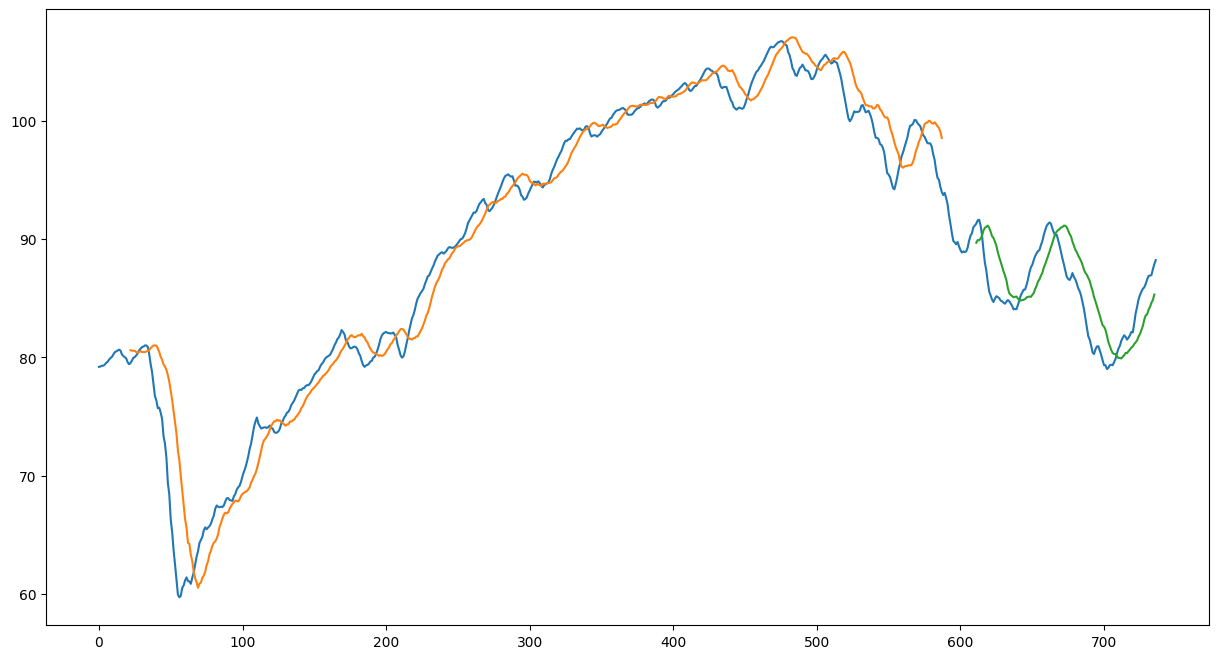

In [79]:
# plot baseline and predictions
plt.figure(figsize=(15,8))
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
